<a href="https://colab.research.google.com/github/informramiz/google-colab-ml-cv/blob/master/Region_Masking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage

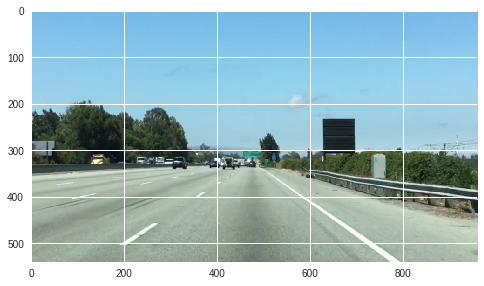

In [3]:
image = mpimage.imread("/content/sample_data/test.jpg")
plt.imshow(image)

In [14]:
xSize = image.shape[1]
ySize = image.shape[0]
print("(x, y) = (%d, %d)" % (xSize, ySize))

(x, y) = (960, 540)


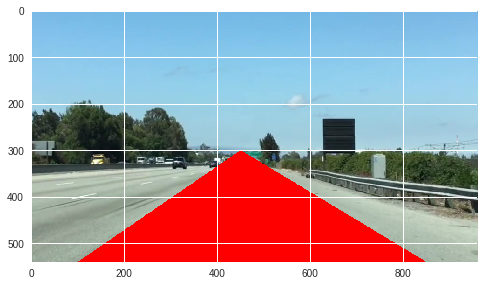

In [44]:
region_select = np.copy(image)
#region selection points (triangle, 3 points)
left_bottom = [100, 539]
right_bottom = [850, 540]
apex = [450, 300]

#fit lines (line is polynomial of degree 1)
#fit triangle's left line, will return (m, c)
fit_left = np.polyfit(x = (left_bottom[0], apex[0]), y = (left_bottom[1], apex[1]), deg = 1)
#right line
fit_right = np.polyfit(x = (right_bottom[0], apex[0]), y = (right_bottom[1], apex[1]), deg = 1)
#bottom line
fit_bottom = np.polyfit(x = (left_bottom[0], right_bottom[0]), y = (left_bottom[1], right_bottom[1]), deg = 1)

#make a 2D grid having coordinates for image
XX, YY = np.meshgrid(np.arange(0, xSize), np.arange(0, ySize))

#now that we have (m, c) for all 3 lines of triangle, and also all x-coordinates
# in XX matrix/grid, we get corresponding y-coordinates that are inside region of interest
#using y = mx + c equation
#fit_left = [m, c] so
y_left = fit_left[0] * XX + fit_left[1]
y_right = fit_right[0] * XX + fit_right[1]
y_bottom = fit_bottom[0] * XX + fit_bottom[1]

region_thresholds = (YY > y_left) & (YY > y_right) & (YY < y_bottom)
region_select[region_thresholds] = [255, 0, 0]

plt.imshow(region_select)
plt.show()

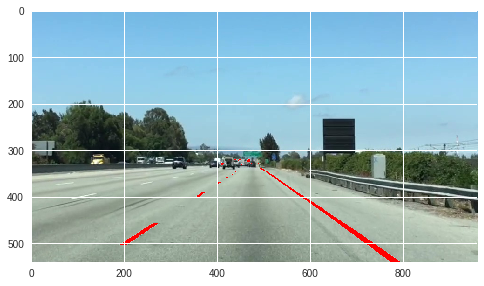

In [45]:
rgb_threshold = [200, 200, 200]
color_thresholds = (image[:, :, 0] < rgb_threshold[0]) | (image[:, :, 1] < rgb_threshold[1]) \
  | (image[:, :, 2] < rgb_threshold[2])

line_image = np.copy(image)
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]
plt.imshow(line_image)